# 📝 Project: Tweet Virality Prediction (ML)

In [147]:
# Setup & Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [60]:
# Load and inspect data

df = pd.read_csv("tweet_content-engagement_dataset.csv")
df.head()


,Tweet Content,Likes,Retweets,Virality,Number of Hashtags
0,Attended a session on crypto. Didn't get much ...,100,28,Non-Viral,3
1,Layering is key this fall 🍂 #FashionTips,86,12,Non-Viral,1
2,startups is important... or so they say. Still...,81,31,Non-Viral,2
3,coding is the talk of the tech world right now...,2491,1515,Viral,2
4,Layering is key this fall 🍂 #FashionTips,683,325,Viral,1


## Visualizing Data

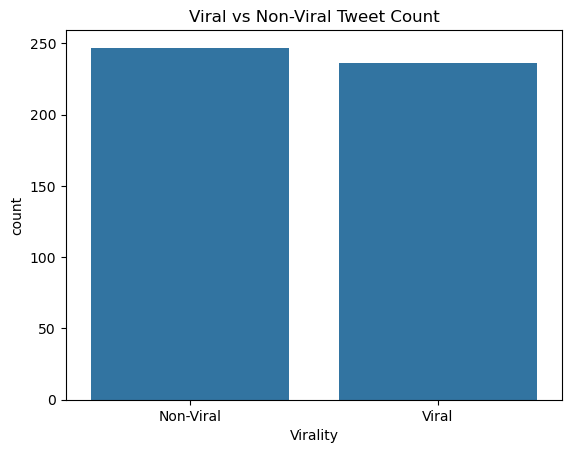

In [62]:
sns.countplot(x='Virality', data=df)
plt.title("Viral vs Non-Viral Tweet Count")
plt.show()


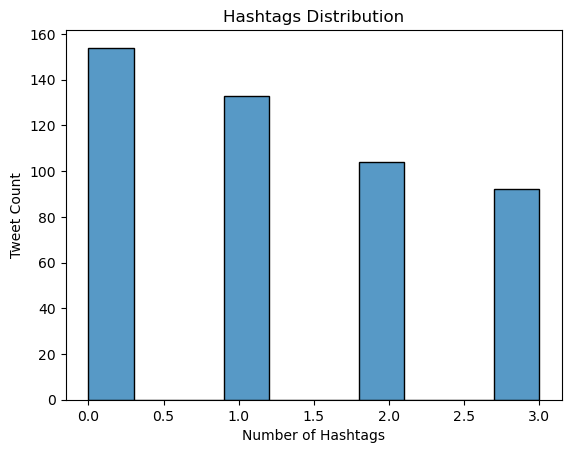

In [63]:
sns.histplot(data=df, x='Number of Hashtags', bins=10)
plt.title("Hashtags Distribution")
plt.xlabel("Number of Hashtags")
plt.ylabel("Tweet Count")
plt.show()


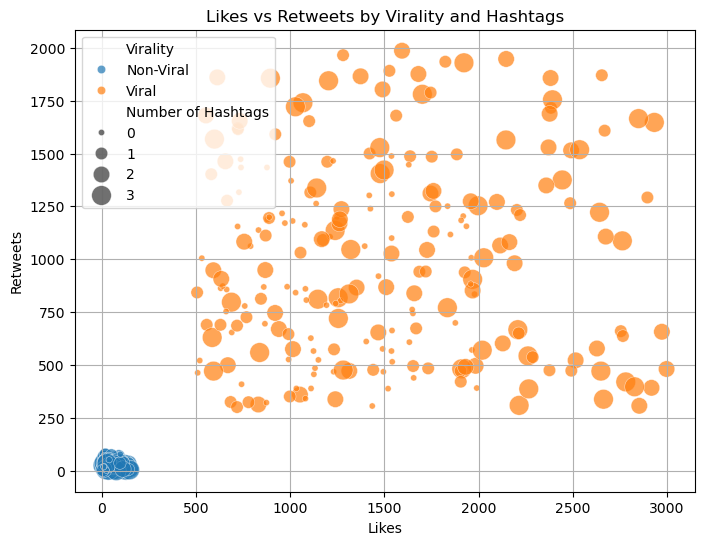

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Likes',
    y='Retweets',
    hue='Virality',
    size='Number of Hashtags',
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Likes vs Retweets by Virality and Hashtags")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.grid(True)
plt.show()


## Feature Engineering

In [135]:
# Features
X_text = df['Tweet Content']
X_hashtag = df[['Number of Hashtags']].values
y = df['Virality'].map({'Non-Viral': 0, 'Viral': 1})

In [137]:
# Split data (same seed, stratified)
X_text_train, X_text_test, X_hash_train, X_hash_test, y_train, y_test = train_test_split(
    X_text, X_hashtag, y, test_size=0.2, random_state=42, stratify=y
)

In [139]:
# TF-IDF on text
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf.transform(X_text_test).toarray()

# Combine TF-IDF with hashtag count
X_train_combined = np.hstack((X_train_tfidf, X_hash_train))
X_test_combined = np.hstack((X_test_tfidf, X_hash_test))


In [141]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_combined, y_train)

LogisticRegression(max_iter=1000)

In [149]:
# Evaluate
y_pred = model.predict(X_test_combined)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40 10]
 [15 32]]
Accuracy: 0.7422680412371134
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        50
           1       0.76      0.68      0.72        47

    accuracy                           0.74        97
   macro avg       0.74      0.74      0.74        97
weighted avg       0.74      0.74      0.74        97



In [161]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']